In [92]:
import pandas as pd
import numpy as np

In [93]:
tosses = np.array(['Tails', 'Heads', 'Tails', 'Heads', 'Heads'])
tosses == 'Tails'

array([ True, False,  True, False, False])

In [94]:
np.count_nonzero(tosses == 'Tails')

2

In [95]:
sum(tosses == 'Tails')

2

In [96]:
two_groups = np.array(['treatment', 'control'])
np.random.choice(two_groups)

'control'

In [97]:
np.random.choice(two_groups, 10)

array(['control', 'control', 'control', 'treatment', 'control', 'control',
       'treatment', 'treatment', 'treatment', 'control'], dtype='<U9')

In [98]:
def one_bet(x):
    """Returns my net gain if the die shows x spots"""
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [99]:
np.random.choice(np.arange(1, 7))

2

In [100]:
one_bet(np.random.choice(np.arange(1, 7)))

-1

In [101]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [102]:
outcomes = np.array([])

for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)

In [103]:
outcome_table = pd.DataFrame({'Outcome': outcomes})
outcome_table

,Outcome
0,0.0
1,-1.0
2,0.0
3,1.0
4,0.0
...,...
295,0.0
296,1.0
297,0.0
298,-1.0


In [104]:
# outcome_table = outcome_table.groupby('Outcome')['Outcome'].count().reset_index(name='count').sort_values(by=['Outcome'],ascending=False)
outcome_table = outcome_table.groupby('Outcome')['Outcome'].count()
outcome_table = outcome_table.reset_index(name='count')
coutcome_table = outcome_table.sort_values(by=['Outcome'],ascending=False)
outcome_table

,Outcome,count
0,-1.0,103
1,0.0,108
2,1.0,89


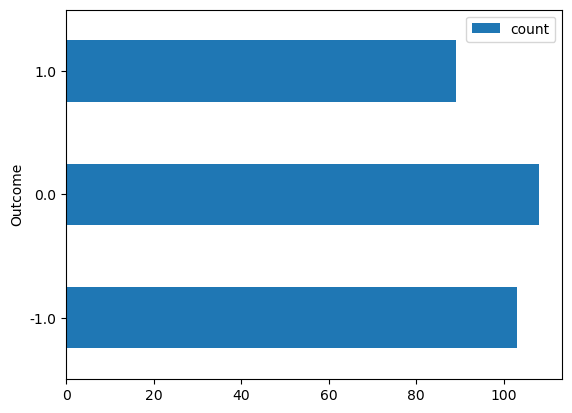

In [105]:
fig = outcome_table.plot.barh(x='Outcome', y='count')

In [106]:
coin = np.array(['Heads', 'Tails'])

In [107]:
np.random.choice(coin, 10)


array(['Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Tails', 'Tails'], dtype='<U5')

In [108]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

61

In [109]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

In [110]:
num_repetitions = 20000   # number of repetitions

heads = np.array([])

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = one_simulated_value()  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

In [111]:
len(heads)

20000

Text(0.5, 0, '# of Heads')

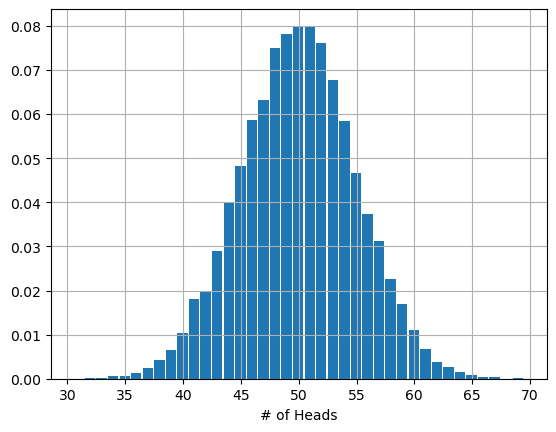

In [112]:
rst_pd = pd.DataFrame(
    {'Repetition': np.arange(1, num_repetitions + 1),
    'Number of Heads': heads}
)
fig = rst_pd['Number of Heads'].hist(bins=np.arange(30.5, 69.6, 1), density = True, width=.9)
# fig = rst_pd['Number of Heads'].hist(bins=np.arange(30.5, 69.6, 1), width =0.9, alpha=0.8)
fig.set_xlabel('# of Heads')


In [113]:
tosses = np.arange(1, 51, 1)
results = pd.DataFrame({'Tosses': tosses, 
                        'Chance of at least one H': 1 - (1/2)**tosses})
results.head(10)

,Tosses,Chance of at least one H
0,1,0.500000
1,2,0.750000
2,3,0.875000
3,4,0.937500
4,5,0.968750
5,6,0.984375
6,7,0.992188
7,8,0.996094
8,9,0.998047
9,10,0.999023


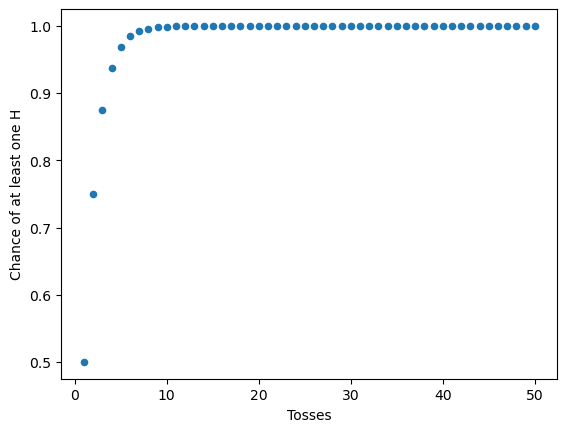

In [114]:
fig = results.plot.scatter(x='Tosses', y='Chance of at least one H')

In [115]:
goats = np.array(['first goat', 'second goat'])
hidden_behind_doors = np.append(goats, 'car')

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [116]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [117]:
monty_hall_game()

['car', 'first goat', 'second goat']

In [118]:
# empty collection table
games= pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.loc[i] = monty_hall_game()

In [119]:
games.head()

,Guess,Revealed,Remaining
0,second goat,first goat,car
1,second goat,first goat,car
2,second goat,first goat,car
3,first goat,second goat,car
4,car,first goat,second goat


In [120]:
# distribtion of [1st goat, 2nd goat, car] in the first guess
original_choice =\
games.groupby('Guess')['Guess'].count().reset_index(name='orig_count')
original_choice

,Guess,orig_count
0,car,3338
1,first goat,3325
2,second goat,3337


In [121]:
# distribution of items in the remaining door
remaining_door =\
games.groupby('Remaining')['Remaining'].count().reset_index(name='rema_count')
remaining_door

,Remaining,rema_count
0,car,6662
1,first goat,1644
2,second goat,1694


In [122]:
joined = original_choice.join(remaining_door.set_index('Remaining'), on='Guess')
joined

,Guess,orig_count,rema_count
0,car,3338,6662
1,first goat,3325,1644
2,second goat,3337,1694


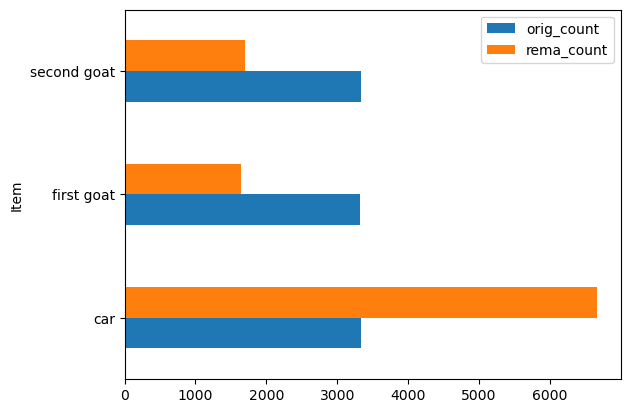

In [123]:
fig = joined.set_index('Guess').plot.barh(ylabel = 'Item')